In [439]:
import pandas as pd

In [441]:
df = pd.read_csv('dirty_cafe_sales.csv')

In [443]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [445]:
df.shape

(10000, 8)

In [447]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [449]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

In [451]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     460
dtype: int64

In [453]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [457]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Transaction ID', 'Item', 'Payment Method', 'Location']
Numerical columns : ['Quantity', 'Price Per Unit', 'Total Spent', 'Transaction Date']


In [459]:
df[cat_col].nunique()

Transaction ID    10000
Item                 10
Payment Method        5
Location              4
dtype: int64

In [461]:
df[num_col].nunique()

Quantity              5
Price Per Unit        6
Total Spent          17
Transaction Date    365
dtype: int64

In [463]:
invalid_items = ['UNKNOWN', 'ERROR']
invalid_df = df[df['Item'].isin(invalid_items)]
invalid_df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6,TXN_4433211,UNKNOWN,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
14,TXN_8915701,ERROR,2.0,1.5,3.0,NaN,In-store,2023-03-21
31,TXN_8927252,UNKNOWN,2.0,1.0,NaN,Credit Card,ERROR,2023-11-06
33,TXN_7710508,UNKNOWN,5.0,1.0,5.0,Cash,NaN,NaT
36,TXN_6855453,UNKNOWN,4.0,3.0,12.0,NaN,In-store,2023-07-17
...,...,...,...,...,...,...,...,...
9946,TXN_8807600,UNKNOWN,1.0,4.0,4.0,Cash,Takeaway,2023-09-24
9951,TXN_4122925,ERROR,4.0,1.0,4.0,NaN,Takeaway,2023-10-20
9958,TXN_4125474,ERROR,2.0,5.0,10.0,Credit Card,In-store,2023-08-02
9981,TXN_4583012,ERROR,5.0,4.0,20.0,Digital Wallet,NaN,2023-02-27


In [465]:
menu_price_map = {
    2.0: "Coffee",
    1.5: "Tea",
    4.0: "Sandwich",  # or Smoothie
    5.0: "Salad",
    3.0: "Cake",      # or Juice
    1.0: "Cookie"
}

In [467]:
condition = df['Item'].isin(['UNKNOWN', 'ERROR','NaN']) & df['Price Per Unit'].isin(menu_price_map.keys())
df.loc[condition, 'Item'] = df.loc[condition, 'Price Per Unit'].map(menu_price_map)

In [469]:
df = df[~(
    (df['Item'].isin(['UNKNOWN', 'ERROR']) | df['Item'].isna()) &
    (df['Price Per Unit'].isin(['UNKNOWN', 'ERROR']) | df['Price Per Unit'].isna()) &
    (df['Total Spent'].isin(['UNKNOWN', 'ERROR']) | df['Total Spent'].isna()) &
    (df['Payment Method'].isin(['UNKNOWN', 'ERROR']) | df['Payment Method'].isna())
)]



In [471]:
mask = df['Price Per Unit'].isna() & df['Total Spent'].notna() & df['Quantity'].notna()
df.loc[mask, 'Price Per Unit'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Quantity']

In [473]:
item_mask = df['Item'].isin(['UNKNOWN', 'ERROR']) | df['Item'].isna()
df.loc[item_mask, 'Price Per Unit'] = pd.to_numeric(df.loc[item_mask, 'Price Per Unit'], errors='coerce')
df.loc[item_mask, 'Item'] = df.loc[item_mask, 'Price Per Unit'].map(menu_price_map)

In [475]:
missing_items = df[
    df['Item'].isna() | df['Item'].isin(['UNKNOWN', 'ERROR'])
]

# There are too many Unknown values, so assuming that the ratio stays 1:1:1, I could evenly distribute the unknown values into Cash, Digital Wallet and Credit Card. 

# Another Assumption we can make is that there is a missing Entry ie: Debit Card and it too would follow the same trend. **

In [478]:
df['Payment Method'] = df['Payment Method'].fillna('Debit Card')

In [480]:
df['Payment Method'].value_counts()

Payment Method
Debit Card        2578
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              305
UNKNOWN            293
Name: count, dtype: int64

In [482]:
df = df[~(
    df['Item'].isna() | df['Item'].isin(['UNKNOWN', 'ERROR'])
)]

In [484]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')  # convert to numeric, invalid become NaN

# Now create a mask for rows where Quantity is NaN (missing or invalid)
mask = df['Quantity'].isna()

# Calculate Quantity for those rows
df.loc[mask, 'Quantity'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Price Per Unit']

# Check the updated rows
print(df.loc[mask, ['Total Spent', 'Price Per Unit', 'Quantity']])

      Total Spent  Price Per Unit  Quantity
20           20.0             4.0       5.0
55            2.0             1.0       2.0
57            3.0             3.0       1.0
66            6.0             3.0       2.0
117           9.0             3.0       3.0
...           ...             ...       ...
9932          3.0             1.5       2.0
9935          6.0             1.5       4.0
9944         15.0             3.0       5.0
9957          8.0             2.0       4.0
9984          4.0             4.0       1.0

[476 rows x 3 columns]


In [486]:
df[
    (
        df['Quantity'].isna() | 
        df['Quantity'].isin(['UNKNOWN', 'ERROR'])
    ) 
    & 
    df['Payment Method'].isin(['Debit Card'])
]


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,NaN,5.0,NaN,Debit Card,In-store,2023-05-18
641,TXN_2962976,Juice,NaN,3.0,NaN,Debit Card,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,Debit Card,Takeaway,2023-05-14
2330,TXN_3849488,Salad,NaN,NaN,5.0,Debit Card,In-store,2023-03-01
3224,TXN_6297232,Coffee,NaN,2.0,NaN,Debit Card,NaN,2023-04-07
6225,TXN_6859249,Cookie,NaN,NaN,2.0,Debit Card,UNKNOWN,NaT
8021,TXN_2428781,Salad,NaN,5.0,NaN,Debit Card,In-store,2023-05-09
8465,TXN_9669616,Coffee,NaN,2.0,NaN,Debit Card,ERROR,2023-06-03
8479,TXN_1547245,Sandwich,NaN,4.0,NaN,Debit Card,Takeaway,2023-09-11


In [488]:
mask = df['Transaction ID'] == 'TXN_3849488'
df.loc[mask, ['Quantity', 'Price Per Unit']] = [1, 5]


In [490]:
mask = df['Transaction ID'] == 'TXN_6859249'
df.loc[mask, ['Quantity', 'Price Per Unit']] = [2, 1]

In [492]:
mask = (
    (
        df['Quantity'].isna() | 
        df['Quantity'].isin(['UNKNOWN', 'ERROR'])
    ) 
    & 
    df['Payment Method'].isin(['Debit Card']) &
    df['Total Spent'].isna()
)

print("Rows to be removed:", mask.sum())


Rows to be removed: 7


In [494]:
df.shape

(9994, 8)

In [496]:
df['Payment Method'] = df['Payment Method'].replace('ERROR', 'UNKNOWN')

In [498]:
df.loc[df['Location'].isna(), 'Location'] = 'UNKNOWN'

In [500]:
df['Row'] = df.index

# Now interpolate on numeric index
df['Transaction Date'] = df['Transaction Date'].interpolate(method='linear')

# Drop helper column if you want
df = df.drop(columns='Row')

In [502]:
df['Transaction Date'] = df['Transaction Date'].dt.date

In [504]:
mask = df['Total Spent'].isna() 
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Quantity'] * df.loc[mask, 'Price Per Unit']


In [506]:
df.head(50)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,UNKNOWN,2023-03-31
6,TXN_4433211,Cake,3.0,3.0,9.0,UNKNOWN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,Cake,5.0,3.0,15.0,Debit Card,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Debit Card,In-store,2023-12-31


# 📈Exploratory Data Analysis

In [517]:
import seaborn as sns
import matplotlib.pylab as plt

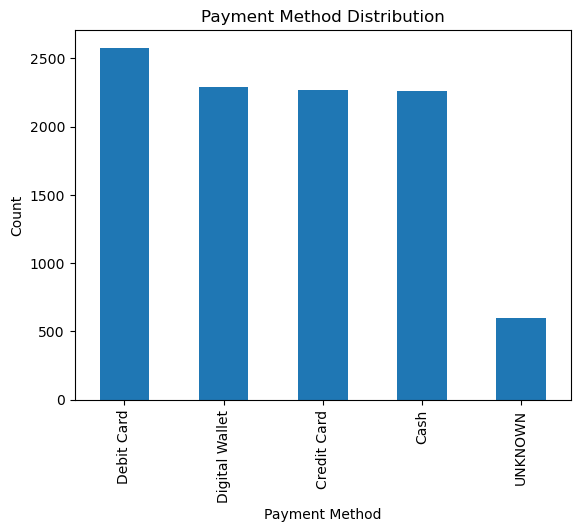

In [525]:
df['Payment Method'].value_counts().plot(kind='bar', title='Payment Method Distribution')
plt.ylabel("Count")
plt.show()


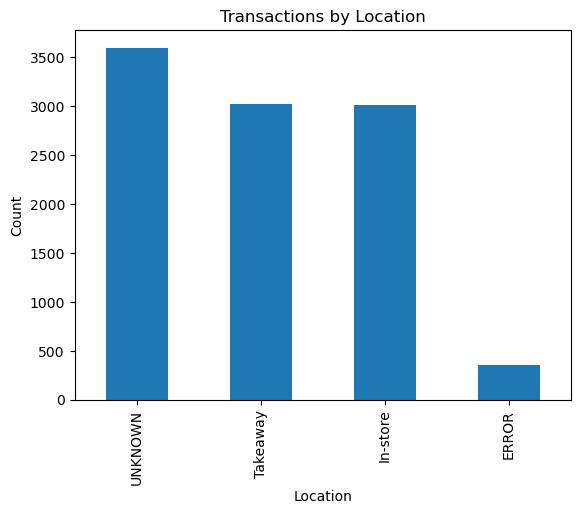

In [527]:
df['Location'].value_counts().plot(kind='bar', title='Transactions by Location')
plt.ylabel("Count")
plt.show()


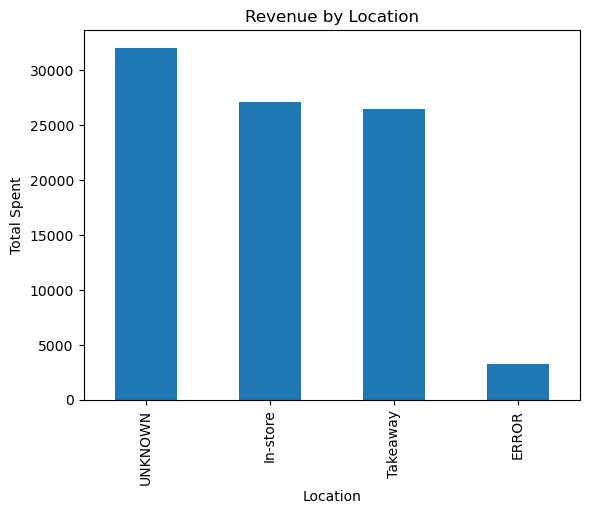

In [529]:
df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False).plot(kind='bar', title='Revenue by Location')
plt.ylabel("Total Spent")
plt.show()


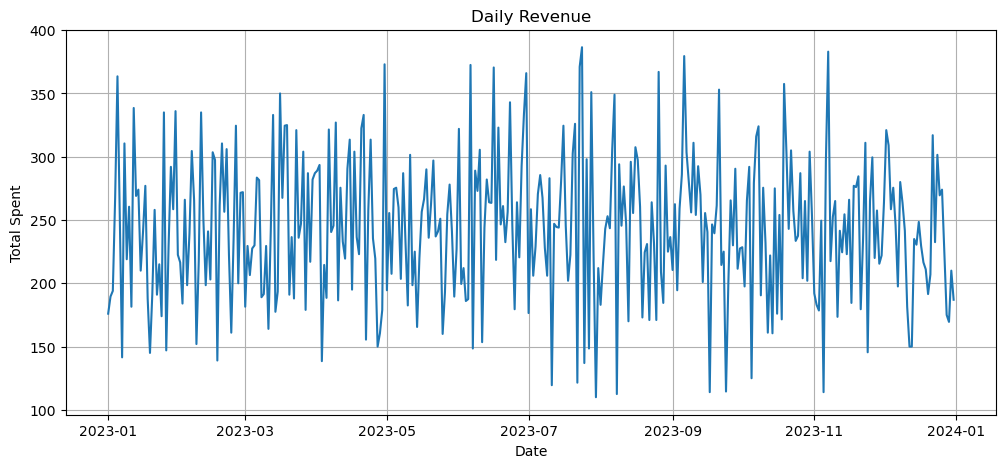

In [531]:
daily_sales = df.groupby('Transaction Date')['Total Spent'].sum()

plt.figure(figsize=(12, 5))
daily_sales.plot()
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Total Spent")
plt.grid(True)
plt.show()


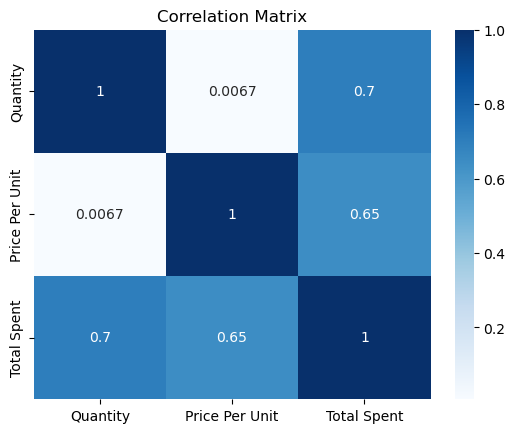

In [533]:
sns.heatmap(df[['Quantity', 'Price Per Unit', 'Total Spent']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


In [535]:
print("Total Transactions:", df.shape[0])
print("Total Revenue: R", df['Total Spent'].sum())
print("Top Payment Method:", df['Payment Method'].mode()[0])
print("Most Common Location:", df['Location'].mode()[0])
print("Most Sold Item:", df['Item'].mode()[0])


Total Transactions: 9994
Total Revenue: R 88898.0
Top Payment Method: Debit Card
Most Common Location: UNKNOWN
Most Sold Item: Cake
